In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import squarify

In [3]:
plt.style.use('fivethirtyeight')


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('D:/Data/Global Terrorism - START data/globalterrorism.csv',encoding='ISO-8859-1')

In [6]:
pd.set_option('display.max_columns',134)

In [7]:
df.shape

(181691, 135)

In [8]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,...,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN

In [9]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [10]:
def wordcloud(column_name):
    # make wordcloud from the text of given column
    text=" ".join(df[df[column_name].notna()][column_name])
    wordcloud = WordCloud(width=800, height=500, max_font_size=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# No of terrorist attack on dirrerent years

In [11]:
yearwise_df=pd.DataFrame(df['iyear'].value_counts())
yearwise_df.columns=['No of terrorist attacks']
yearwise_df.sort_index(inplace=True)
yearwise_df.head()


,No of terrorist attacks
1970,651
1971,471
1972,568
1973,473
1974,581


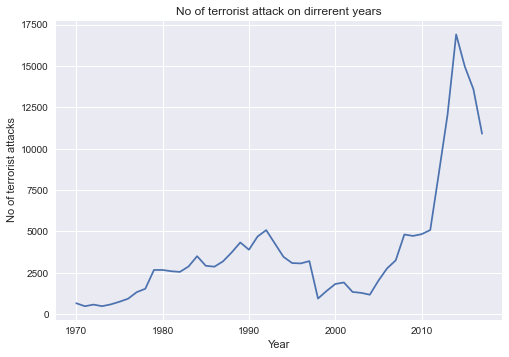

In [12]:
plt.plot(yearwise_df.index,yearwise_df.iloc[:, 0])
plt.xlabel('Year')
plt.ylabel(' No of terrorist attacks')
plt.title('No of terrorist attack on dirrerent years')
plt.show()

#  Which countries are mostly victim of Terrorist attack?

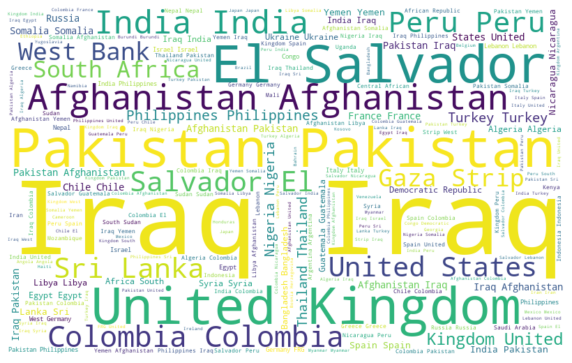

In [13]:
wordcloud('country_txt')

In [14]:
countrywise=df['country_txt'].value_counts()[:10]
countrywise


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

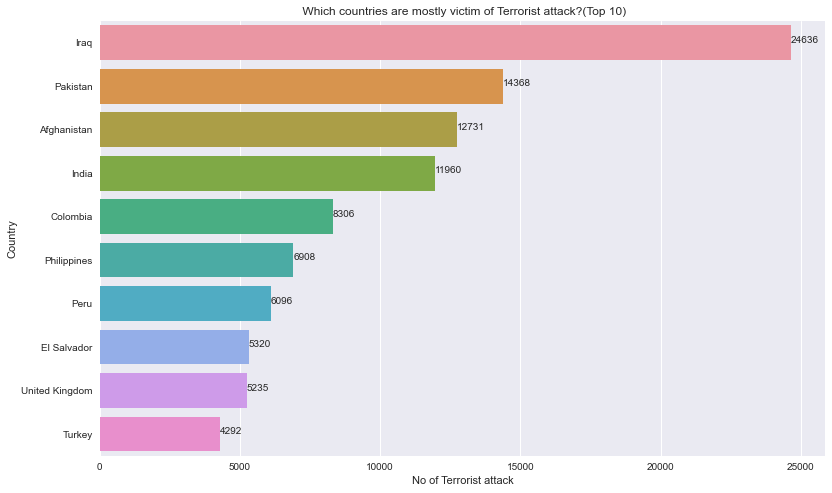

In [15]:
plt.figure(figsize=(13,8))
sns.barplot(countrywise.values,countrywise.index)
for index, value in enumerate(countrywise.values):
    plt.text(value, index, str(value))
plt.ylabel('Country')
plt.xlabel('No of Terrorist attack')
plt.title(' Which countries are mostly victim of Terrorist attack?(Top 10)')
plt.show()

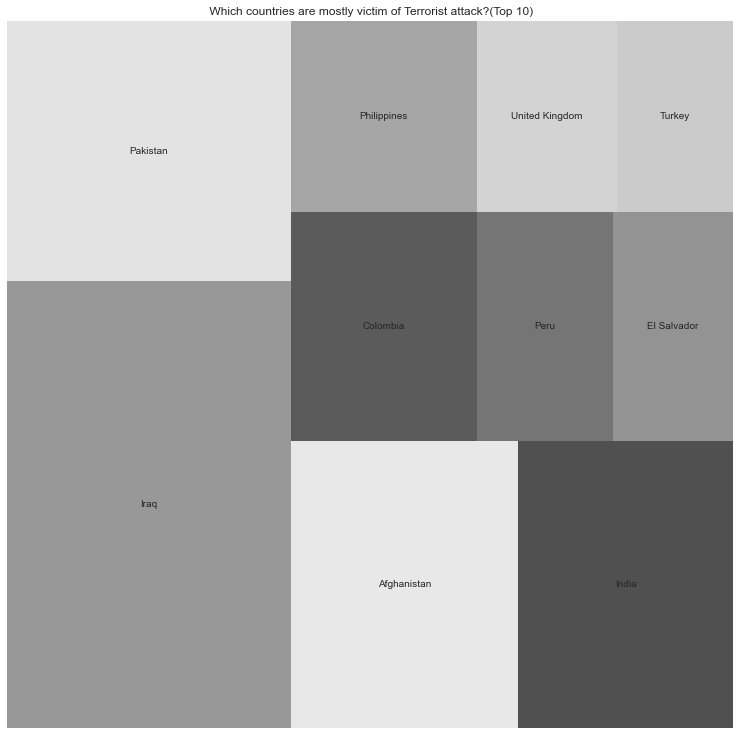

In [16]:
plt.figure(figsize=(13,13))
squarify.plot(sizes=countrywise.values,label=countrywise.index,alpha=0.8)
plt.axis('off')
plt.title(' Which countries are mostly victim of Terrorist attack?(Top 10)')
plt.show()

# Word cloud for summary of incident

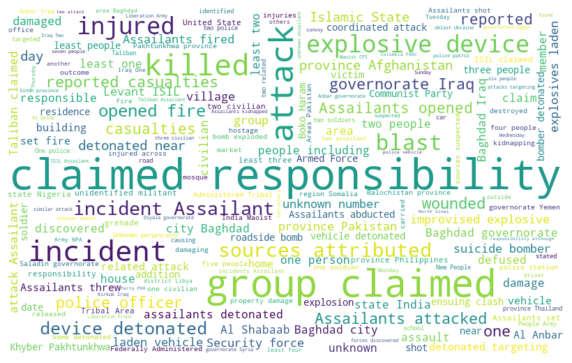

In [17]:
wordcloud('summary')

# Which attack type is more frequent?

In [18]:
attacktype_wise=df['attacktype1_txt'].value_counts()
attacktype_wise

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

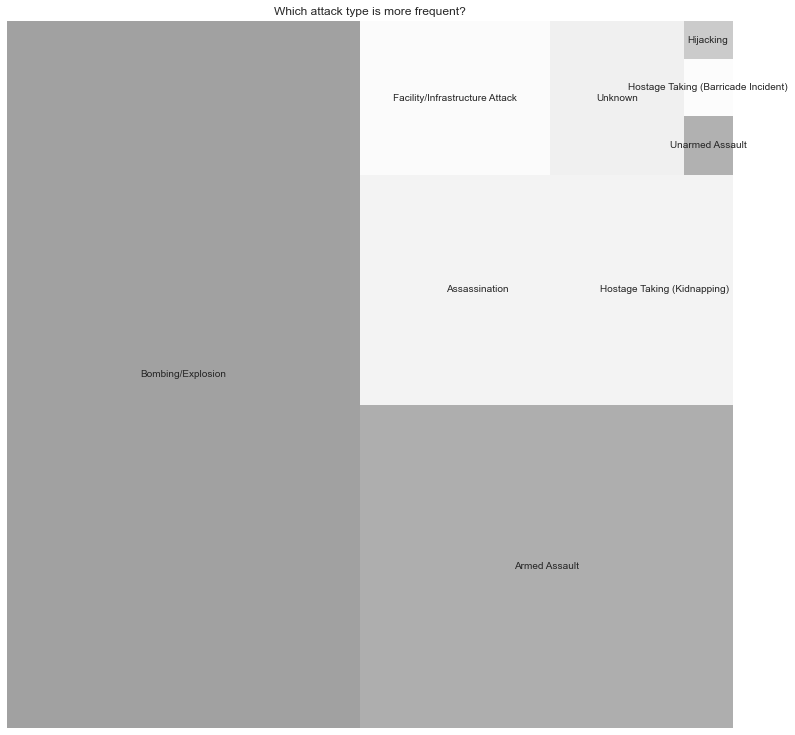

In [19]:
plt.figure(figsize=(13,13))
squarify.plot(sizes=attacktype_wise.values,label=attacktype_wise.index,alpha=0.8)
plt.axis('off')
plt.title('Which attack type is more frequent?')
plt.show()

# where are the terrorist targeting more?

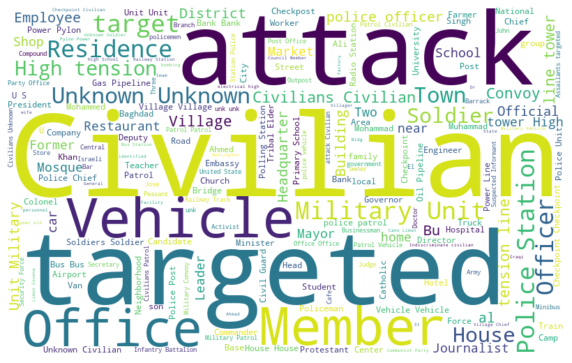

In [20]:
wordcloud('target1')

# which group of terrorist used to cause such incident most?

In [21]:
namewise=df.drop(df[df['gname']=='Unknown'].index)['gname'].value_counts()[:7]
namewise

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Name: gname, dtype: int64

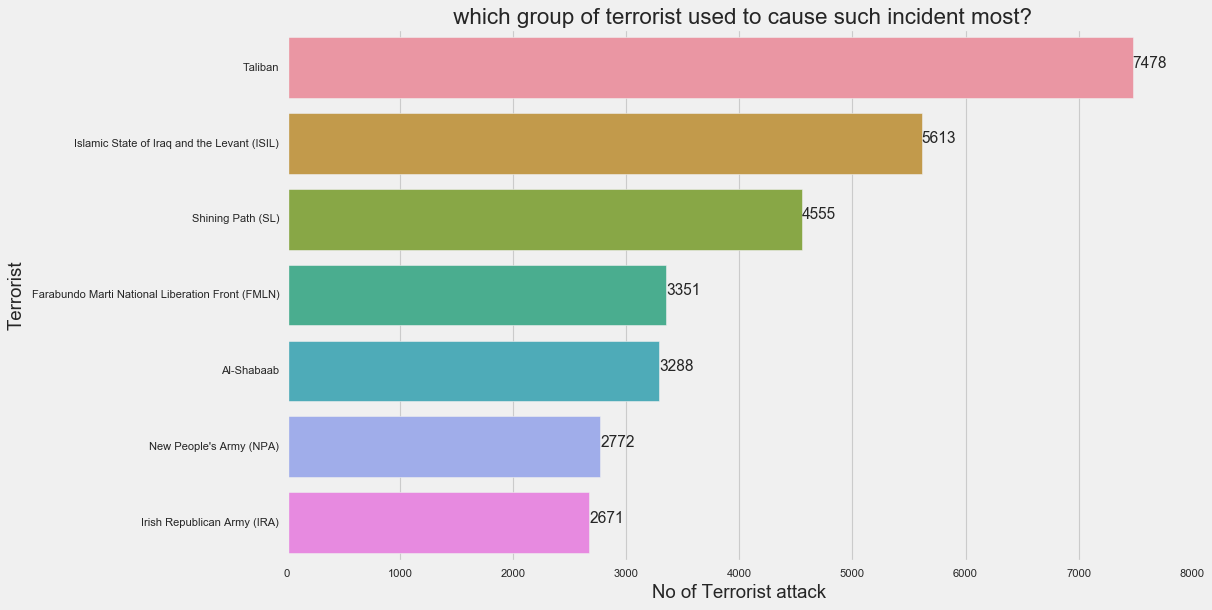

In [58]:
plt.figure(figsize=(13,8))
sns.barplot(namewise.values,namewise.index)
for index, value in enumerate(namewise.values):
    plt.text(value, index, str(value))
plt.ylabel('Terrorist')
plt.xlabel('No of Terrorist attack')
plt.title(' which group of terrorist used to cause such incident most?')
plt.show()

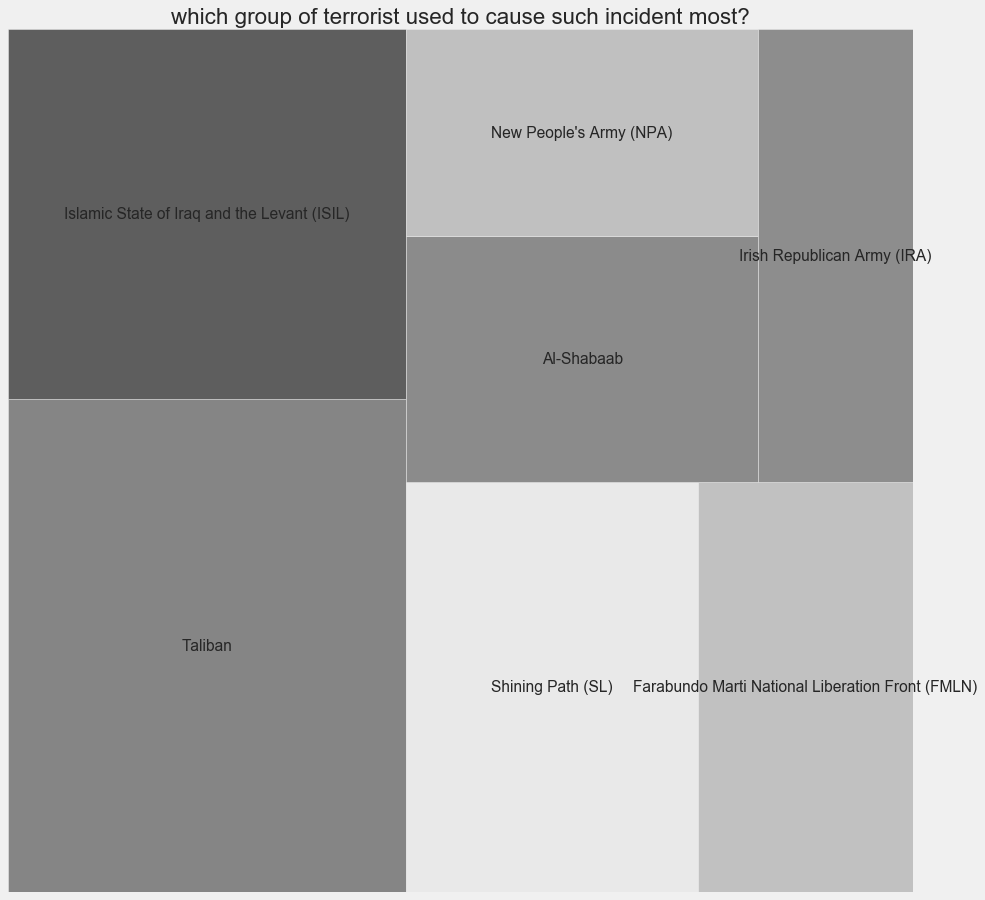

In [60]:
plt.figure(figsize=(13,13))
squarify.plot(sizes=namewise.values,label=namewise.index,alpha=0.8)
plt.axis('off')
plt.title('which group of terrorist used to cause such incident most?')
plt.show()

#  What's sorts of weapen are used by different terrorist?

In [24]:
weapentype_wise=df['weaptype1_txt'].value_counts()[:5]

In [25]:
weapentype_wise.shape

(5,)

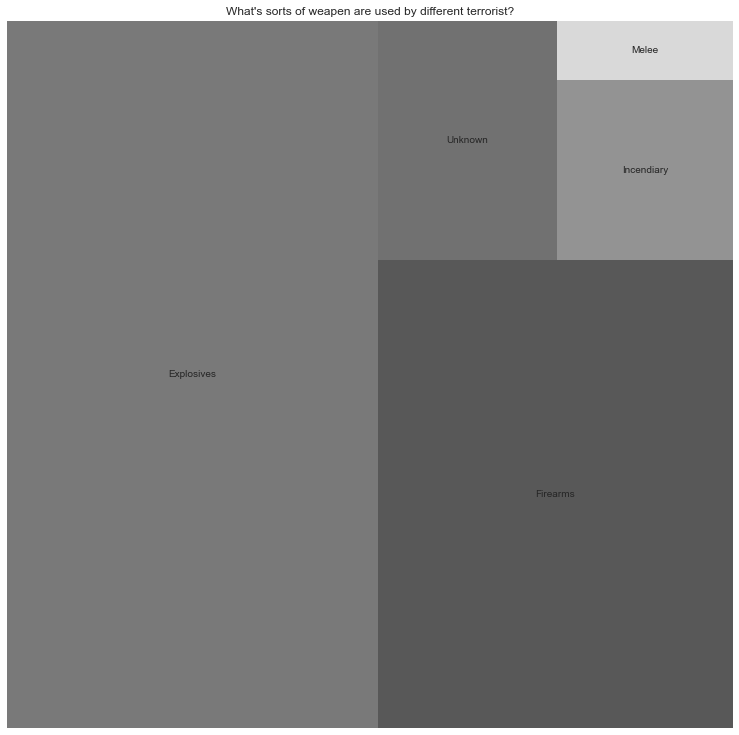

In [26]:
plt.figure(figsize=(13,13))
squarify.plot(sizes=weapentype_wise.values,label=weapentype_wise.index,alpha=0.8)
plt.axis('off')
plt.title("What's sorts of weapen are used by different terrorist?")
plt.show()

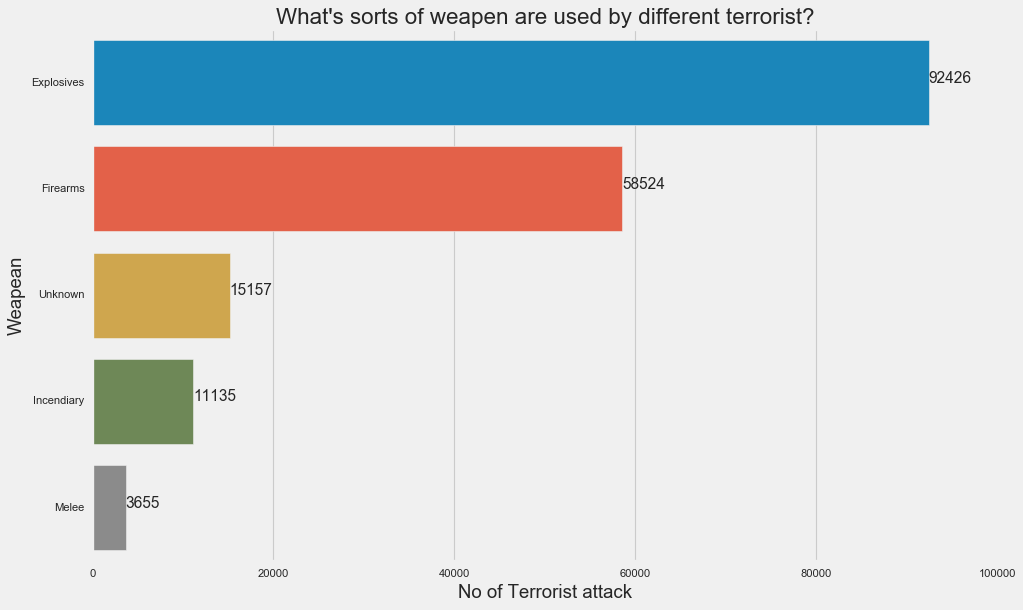

In [57]:
plt.figure(figsize=(13,8))
sns.barplot(weapentype_wise.values,weapentype_wise.index)
for index, value in enumerate(weapentype_wise.values):
    plt.text(value, index, str(value))
plt.ylabel('Weapean')
plt.xlabel('No of Terrorist attack')
plt.title("What's sorts of weapen are used by different terrorist?")
plt.show()

# Deaths caused by different group of terrorist group